In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [12]:
train_dataset  = train_datagen.flow_from_directory(directory = '/Users/nayanadorairaj/Desktop/Foundations of AI/archive/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 22968 images belonging to 7 classes.


In [14]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/Users/nayanadorairaj/Desktop/Foundations of AI/archive/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 5741 images belonging to 7 classes.


In [16]:
test_dataset = test_datagen.flow_from_directory(directory = '/Users/nayanadorairaj/Desktop/Foundations of AI/archive/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 7178 images belonging to 7 classes.


In [18]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [19]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

In [22]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [24]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,885,383 (91.12 MB)

 Trainable params: 1,335,815 (5.10 MB)

 Non-trainable params: 22,549,568 (86.02 MB)

In [26]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_true = tf.round(tf.clip_by_value(y_true, 0, 1))

    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    possible_positives = tf.reduce_sum(tf.cast(y_true, tf.float32))
    predicted_positives = tf.reduce_sum(tf.cast(y_pred, tf.float32))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())

    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1_val

In [28]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [30]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [34]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 60,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/60


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8541 - auc: 0.5846 - f1_score: 0.0152 - loss: 1.9654 - precision: 0.2173 - recall: 0.0080

359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.8541 - auc: 0.5847 - f1_score: 0.0152 - loss: 1.9652 - precision: 0.2173 - recall: 0.0080 - val_accuracy: 0.8570 - val_auc: 0.6192 - val_f1_score: 6.8376e-04 - val_loss: 1.8501 - val_precision: 0.2500 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8568 - auc: 0.6345 - f1_score: 0.0013 - loss: 1.8371 - precision: 0.1757 - recall: 6.5178e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step - accuracy: 0.8568 - auc: 0.6345 - f1_score: 0.0013 - loss: 1.8370 - precision: 0.1757 - recall: 6.5178e-04 - val_accuracy: 0.8571 - val_auc: 0.6374 - val_f1_score: 0.0000e+00 - val_loss: 1.8255 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8571 - auc: 0.6368 - f1_score: 9.5205e-04 - loss: 1.8224 - precision: 0.3864 - recall: 4.8346e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.8571 - auc: 0.6368 - f1_score: 9.5083e-04 - loss: 1.8224 - precision: 0.3862 - recall: 4.8285e-04 - val_accuracy: 0.8571 - val_auc: 0.6522 - val_f1_score: 0.0000e+00 - val_loss: 1.8129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8571 - auc: 0.6430 - f1_score: 4.3861e-05 - loss: 1.8163 - precision: 0.0930 - recall: 2.2282e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.8571 - auc: 0.6430 - f1_score: 4.3978e-05 - loss: 1.8163 - precision: 0.0933 - recall: 2.2341e-05 - val_accuracy: 0.8571 - val_auc: 0.6527 - val_f1_score: 0.0000e+00 - val_loss: 1.8067 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8571 - auc: 0.6397 - f1_score: 0.0000e+00 - loss: 1.8192 - precision: 0.0000e+00 - recall: 0.0000e+00

359/359 ━━━━━━━━━━━━━━━━━━━━ 47s 130ms/step - accuracy: 0.8571 - auc: 0.6397 - f1_score: 0.0000e+00 - loss: 1.8192 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8571 - val_auc: 0.6542 - val_f1_score: 0.0000e+00 - val_loss: 1.8030 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8572 - auc: 0.6439 - f1_score: 3.0280e-04 - loss: 1.8147 - precision: 0.9721 - recall: 1.5378e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8572 - auc: 0.6439 - f1_score: 3.0220e-04 - loss: 1.8147 - precision: 0.9722 - recall: 1.5347e-04 - val_accuracy: 0.8571 - val_auc: 0.6608 - val_f1_score: 0.0000e+00 - val_loss: 1.7997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8571 - auc: 0.6481 - f1_score: 0.0000e+00 - loss: 1.8097 - precision: 0.0000e+00 - recall: 0.0000e+00

359/359 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.8571 - auc: 0.6481 - f1_score: 0.0000e+00 - loss: 1.8097 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8571 - val_auc: 0.6613 - val_f1_score: 0.0000e+00 - val_loss: 1.7957 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8571 - auc: 0.6457 - f1_score: 0.0000e+00 - loss: 1.8118 - precision: 0.0000e+00 - recall: 0.0000e+00

359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - accuracy: 0.8571 - auc: 0.6457 - f1_score: 0.0000e+00 - loss: 1.8118 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8571 - val_auc: 0.6561 - val_f1_score: 0.0000e+00 - val_loss: 1.8049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8571 - auc: 0.6486 - f1_score: 0.0000e+00 - loss: 1.8097 - precision: 0.0000e+00 - recall: 0.0000e+00

359/359 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.8571 - auc: 0.6486 - f1_score: 0.0000e+00 - loss: 1.8097 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8571 - val_auc: 0.6596 - val_f1_score: 0.0000e+00 - val_loss: 1.7978 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8572 - auc: 0.6540 - f1_score: 3.8968e-04 - loss: 1.8019 - precision: 0.5487 - recall: 1.9790e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.8572 - auc: 0.6540 - f1_score: 3.8955e-04 - loss: 1.8019 - precision: 0.5491 - recall: 1.9784e-04 - val_accuracy: 0.8571 - val_auc: 0.6651 - val_f1_score: 0.0000e+00 - val_loss: 1.7899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8571 - auc: 0.6567 - f1_score: 0.0000e+00 - loss: 1.7988 - precision: 0.0000e+00 - recall: 0.0000e+00

359/359 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.8571 - auc: 0.6567 - f1_score: 0.0000e+00 - loss: 1.7988 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8571 - val_auc: 0.6784 - val_f1_score: 0.0000e+00 - val_loss: 1.7844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 12/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8571 - auc: 0.6569 - f1_score: 4.1122e-05 - loss: 1.7988 - precision: 0.3816 - recall: 2.0884e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.8571 - auc: 0.6569 - f1_score: 4.1245e-05 - loss: 1.7988 - precision: 0.3833 - recall: 2.0947e-05 - val_accuracy: 0.8571 - val_auc: 0.6718 - val_f1_score: 0.0000e+00 - val_loss: 1.7817 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 13/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8571 - auc: 0.6570 - f1_score: 8.1359e-05 - loss: 1.7981 - precision: 0.2632 - recall: 4.1334e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.8571 - auc: 0.6570 - f1_score: 8.1609e-05 - loss: 1.7981 - precision: 0.2644 - recall: 4.1461e-05 - val_accuracy: 0.8571 - val_auc: 0.6624 - val_f1_score: 0.0000e+00 - val_loss: 1.7968 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 14/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8572 - auc: 0.6562 - f1_score: 6.9375e-04 - loss: 1.7979 - precision: 0.5611 - recall: 3.5231e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - accuracy: 0.8572 - auc: 0.6562 - f1_score: 6.9254e-04 - loss: 1.7979 - precision: 0.5609 - recall: 3.5170e-04 - val_accuracy: 0.8571 - val_auc: 0.6644 - val_f1_score: 0.0000e+00 - val_loss: 1.7939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 15/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8571 - auc: 0.6614 - f1_score: 1.8392e-04 - loss: 1.7942 - precision: 0.2252 - recall: 9.3452e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - accuracy: 0.8571 - auc: 0.6614 - f1_score: 1.8413e-04 - loss: 1.7942 - precision: 0.2257 - recall: 9.3556e-05 - val_accuracy: 0.8571 - val_auc: 0.6741 - val_f1_score: 0.0000e+00 - val_loss: 1.7783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 16/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8571 - auc: 0.6596 - f1_score: 7.5172e-05 - loss: 1.7936 - precision: 0.1302 - recall: 3.8184e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.8571 - auc: 0.6596 - f1_score: 7.5440e-05 - loss: 1.7936 - precision: 0.1307 - recall: 3.8320e-05 - val_accuracy: 0.8571 - val_auc: 0.6696 - val_f1_score: 0.0000e+00 - val_loss: 1.7860 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 17/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8571 - auc: 0.6634 - f1_score: 5.4488e-04 - loss: 1.7929 - precision: 0.4394 - recall: 2.7771e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - accuracy: 0.8571 - auc: 0.6634 - f1_score: 5.4550e-04 - loss: 1.7929 - precision: 0.4397 - recall: 2.7803e-04 - val_accuracy: 0.8571 - val_auc: 0.6864 - val_f1_score: 0.0000e+00 - val_loss: 1.7648 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 18/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8571 - auc: 0.6614 - f1_score: 6.5405e-04 - loss: 1.7933 - precision: 0.4192 - recall: 3.3245e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 51s 142ms/step - accuracy: 0.8571 - auc: 0.6614 - f1_score: 6.5342e-04 - loss: 1.7933 - precision: 0.4193 - recall: 3.3213e-04 - val_accuracy: 0.8571 - val_auc: 0.6839 - val_f1_score: 0.0000e+00 - val_loss: 1.7714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 19/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8572 - auc: 0.6672 - f1_score: 0.0010 - loss: 1.7858 - precision: 0.5436 - recall: 5.2514e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.8572 - auc: 0.6671 - f1_score: 0.0010 - loss: 1.7858 - precision: 0.5433 - recall: 5.2465e-04 - val_accuracy: 0.8571 - val_auc: 0.6766 - val_f1_score: 0.0000e+00 - val_loss: 1.7725 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 20/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8571 - auc: 0.6666 - f1_score: 8.6704e-05 - loss: 1.7868 - precision: 0.2143 - recall: 4.4040e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.8571 - auc: 0.6666 - f1_score: 8.7415e-05 - loss: 1.7868 - precision: 0.2156 - recall: 4.4402e-05 - val_accuracy: 0.8571 - val_auc: 0.6853 - val_f1_score: 0.0000e+00 - val_loss: 1.7668 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 21/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8571 - auc: 0.6658 - f1_score: 1.1193e-04 - loss: 1.7894 - precision: 0.1082 - recall: 5.6854e-05

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - accuracy: 0.8571 - auc: 0.6658 - f1_score: 1.1257e-04 - loss: 1.7894 - precision: 0.1089 - recall: 5.7180e-05 - val_accuracy: 0.8571 - val_auc: 0.6876 - val_f1_score: 0.0000e+00 - val_loss: 1.7637 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 22/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8571 - auc: 0.6689 - f1_score: 2.7458e-04 - loss: 1.7831 - precision: 0.4102 - recall: 1.3951e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.8571 - auc: 0.6689 - f1_score: 2.7525e-04 - loss: 1.7831 - precision: 0.4100 - recall: 1.3984e-04 - val_accuracy: 0.8571 - val_auc: 0.6859 - val_f1_score: 0.0000e+00 - val_loss: 1.7639 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 23/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8571 - auc: 0.6663 - f1_score: 3.6699e-04 - loss: 1.7885 - precision: 0.4913 - recall: 1.8651e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.8571 - auc: 0.6663 - f1_score: 3.6716e-04 - loss: 1.7885 - precision: 0.4915 - recall: 1.8660e-04 - val_accuracy: 0.8572 - val_auc: 0.6758 - val_f1_score: 6.8376e-04 - val_loss: 1.7881 - val_precision: 1.0000 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 24/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8571 - auc: 0.6676 - f1_score: 9.8451e-04 - loss: 1.7863 - precision: 0.4735 - recall: 5.0058e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.8571 - auc: 0.6676 - f1_score: 9.8463e-04 - loss: 1.7863 - precision: 0.4736 - recall: 5.0064e-04 - val_accuracy: 0.8571 - val_auc: 0.6906 - val_f1_score: 3.4188e-04 - val_loss: 1.7582 - val_precision: 0.5000 - val_recall: 1.7419e-04 - learning_rate: 0.0010
Epoch 25/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8572 - auc: 0.6673 - f1_score: 0.0014 - loss: 1.7856 - precision: 0.6593 - recall: 7.2525e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8572 - auc: 0.6673 - f1_score: 0.0014 - loss: 1.7856 - precision: 0.6592 - recall: 7.2445e-04 - val_accuracy: 0.8573 - val_auc: 0.6755 - val_f1_score: 0.0027 - val_loss: 1.7855 - val_precision: 0.8000 - val_recall: 0.0014 - learning_rate: 0.0010
Epoch 26/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8571 - auc: 0.6710 - f1_score: 3.8272e-04 - loss: 1.7819 - precision: 0.2837 - recall: 1.9437e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 150ms/step - accuracy: 0.8571 - auc: 0.6710 - f1_score: 3.8309e-04 - loss: 1.7819 - precision: 0.2839 - recall: 1.9455e-04 - val_accuracy: 0.8572 - val_auc: 0.6884 - val_f1_score: 6.8376e-04 - val_loss: 1.7637 - val_precision: 0.6667 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 27/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8572 - auc: 0.6699 - f1_score: 0.0017 - loss: 1.7823 - precision: 0.5580 - recall: 8.6351e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8572 - auc: 0.6699 - f1_score: 0.0017 - loss: 1.7823 - precision: 0.5577 - recall: 8.6317e-04 - val_accuracy: 0.8571 - val_auc: 0.6701 - val_f1_score: 0.0000e+00 - val_loss: 1.7873 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 28/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8571 - auc: 0.6749 - f1_score: 2.3332e-04 - loss: 1.7758 - precision: 0.2498 - recall: 1.1850e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.8571 - auc: 0.6749 - f1_score: 2.3410e-04 - loss: 1.7758 - precision: 0.2502 - recall: 1.1890e-04 - val_accuracy: 0.8573 - val_auc: 0.6838 - val_f1_score: 0.0027 - val_loss: 1.7840 - val_precision: 0.7273 - val_recall: 0.0014 - learning_rate: 0.0010
Epoch 29/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8571 - auc: 0.6698 - f1_score: 7.7585e-04 - loss: 1.7827 - precision: 0.5476 - recall: 3.9467e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8571 - auc: 0.6698 - f1_score: 7.7583e-04 - loss: 1.7827 - precision: 0.5478 - recall: 3.9466e-04 - val_accuracy: 0.8571 - val_auc: 0.6922 - val_f1_score: 0.0000e+00 - val_loss: 1.7540 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 30/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8572 - auc: 0.6722 - f1_score: 0.0012 - loss: 1.7801 - precision: 0.5630 - recall: 6.0504e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.8572 - auc: 0.6722 - f1_score: 0.0012 - loss: 1.7801 - precision: 0.5632 - recall: 6.0493e-04 - val_accuracy: 0.8571 - val_auc: 0.6888 - val_f1_score: 0.0000e+00 - val_loss: 1.7574 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 31/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8571 - auc: 0.6701 - f1_score: 0.0016 - loss: 1.7844 - precision: 0.5138 - recall: 8.1545e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.8571 - auc: 0.6701 - f1_score: 0.0016 - loss: 1.7844 - precision: 0.5136 - recall: 8.1633e-04 - val_accuracy: 0.8574 - val_auc: 0.6812 - val_f1_score: 0.0146 - val_loss: 1.7717 - val_precision: 0.5584 - val_recall: 0.0075 - learning_rate: 0.0010
Epoch 32/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8572 - auc: 0.6722 - f1_score: 0.0018 - loss: 1.7801 - precision: 0.6195 - recall: 9.2952e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.8572 - auc: 0.6722 - f1_score: 0.0018 - loss: 1.7801 - precision: 0.6192 - recall: 9.2996e-04 - val_accuracy: 0.8571 - val_auc: 0.6968 - val_f1_score: 0.0000e+00 - val_loss: 1.7479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 33/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8570 - auc: 0.6755 - f1_score: 0.0014 - loss: 1.7753 - precision: 0.2493 - recall: 6.9699e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 153ms/step - accuracy: 0.8570 - auc: 0.6755 - f1_score: 0.0014 - loss: 1.7754 - precision: 0.2492 - recall: 6.9614e-04 - val_accuracy: 0.8571 - val_auc: 0.6933 - val_f1_score: 0.0000e+00 - val_loss: 1.7518 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 34/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8571 - auc: 0.6747 - f1_score: 9.3133e-04 - loss: 1.7742 - precision: 0.3689 - recall: 4.7471e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.8571 - auc: 0.6747 - f1_score: 9.2993e-04 - loss: 1.7742 - precision: 0.3685 - recall: 4.7400e-04 - val_accuracy: 0.8572 - val_auc: 0.6841 - val_f1_score: 0.0027 - val_loss: 1.7752 - val_precision: 0.6667 - val_recall: 0.0014 - learning_rate: 0.0010
Epoch 35/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8571 - auc: 0.6761 - f1_score: 3.2363e-04 - loss: 1.7760 - precision: 0.2074 - recall: 1.6443e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 151ms/step - accuracy: 0.8571 - auc: 0.6760 - f1_score: 3.2368e-04 - loss: 1.7760 - precision: 0.2076 - recall: 1.6445e-04 - val_accuracy: 0.8571 - val_auc: 0.6927 - val_f1_score: 0.0000e+00 - val_loss: 1.7552 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 36/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8572 - auc: 0.6779 - f1_score: 0.0016 - loss: 1.7704 - precision: 0.5905 - recall: 8.0110e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.8572 - auc: 0.6779 - f1_score: 0.0016 - loss: 1.7705 - precision: 0.5905 - recall: 8.0045e-04 - val_accuracy: 0.8572 - val_auc: 0.6874 - val_f1_score: 0.0017 - val_loss: 1.7691 - val_precision: 0.6250 - val_recall: 8.7093e-04 - learning_rate: 0.0010
Epoch 37/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8571 - auc: 0.6776 - f1_score: 9.1962e-04 - loss: 1.7701 - precision: 0.2636 - recall: 4.6831e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.8571 - auc: 0.6776 - f1_score: 9.2206e-04 - loss: 1.7701 - precision: 0.2640 - recall: 4.6955e-04 - val_accuracy: 0.8571 - val_auc: 0.6841 - val_f1_score: 0.0000e+00 - val_loss: 1.7668 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 38/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8572 - auc: 0.6759 - f1_score: 9.6661e-04 - loss: 1.7766 - precision: 0.7402 - recall: 4.9103e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 157ms/step - accuracy: 0.8572 - auc: 0.6759 - f1_score: 9.6845e-04 - loss: 1.7766 - precision: 0.7400 - recall: 4.9196e-04 - val_accuracy: 0.8571 - val_auc: 0.6821 - val_f1_score: 0.0046 - val_loss: 1.7655 - val_precision: 0.5000 - val_recall: 0.0023 - learning_rate: 0.0010
Epoch 39/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8571 - auc: 0.6724 - f1_score: 0.0020 - loss: 1.7831 - precision: 0.3985 - recall: 0.0010

359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 160ms/step - accuracy: 0.8571 - auc: 0.6724 - f1_score: 0.0020 - loss: 1.7831 - precision: 0.3984 - recall: 0.0010 - val_accuracy: 0.8572 - val_auc: 0.6948 - val_f1_score: 0.0010 - val_loss: 1.7492 - val_precision: 0.6000 - val_recall: 5.2256e-04 - learning_rate: 0.0010
Epoch 40/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8572 - auc: 0.6770 - f1_score: 0.0024 - loss: 1.7745 - precision: 0.5716 - recall: 0.0012

359/359 ━━━━━━━━━━━━━━━━━━━━ 59s 163ms/step - accuracy: 0.8572 - auc: 0.6770 - f1_score: 0.0024 - loss: 1.7745 - precision: 0.5714 - recall: 0.0012 - val_accuracy: 0.8571 - val_auc: 0.6849 - val_f1_score: 0.0000e+00 - val_loss: 1.7631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 41/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8571 - auc: 0.6793 - f1_score: 0.0017 - loss: 1.7707 - precision: 0.3613 - recall: 8.5268e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 161ms/step - accuracy: 0.8571 - auc: 0.6793 - f1_score: 0.0017 - loss: 1.7707 - precision: 0.3615 - recall: 8.5249e-04 - val_accuracy: 0.8571 - val_auc: 0.6952 - val_f1_score: 0.0000e+00 - val_loss: 1.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 42/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8572 - auc: 0.6750 - f1_score: 0.0012 - loss: 1.7775 - precision: 0.4937 - recall: 6.1024e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 162ms/step - accuracy: 0.8572 - auc: 0.6750 - f1_score: 0.0012 - loss: 1.7775 - precision: 0.4938 - recall: 6.1108e-04 - val_accuracy: 0.8571 - val_auc: 0.6892 - val_f1_score: 0.0000e+00 - val_loss: 1.7576 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 43/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8571 - auc: 0.6775 - f1_score: 9.6921e-04 - loss: 1.7745 - precision: 0.4001 - recall: 4.9218e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 57s 158ms/step - accuracy: 0.8571 - auc: 0.6775 - f1_score: 9.6961e-04 - loss: 1.7745 - precision: 0.4003 - recall: 4.9239e-04 - val_accuracy: 0.8571 - val_auc: 0.6966 - val_f1_score: 3.4188e-04 - val_loss: 1.7480 - val_precision: 0.3333 - val_recall: 1.7419e-04 - learning_rate: 0.0010
Epoch 44/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8572 - auc: 0.6776 - f1_score: 0.0017 - loss: 1.7744 - precision: 0.6985 - recall: 8.4187e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 57s 158ms/step - accuracy: 0.8572 - auc: 0.6776 - f1_score: 0.0017 - loss: 1.7744 - precision: 0.6980 - recall: 8.4158e-04 - val_accuracy: 0.8572 - val_auc: 0.6946 - val_f1_score: 6.8376e-04 - val_loss: 1.7498 - val_precision: 0.6667 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 45/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8571 - auc: 0.6791 - f1_score: 0.0016 - loss: 1.7706 - precision: 0.3957 - recall: 8.1686e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 150ms/step - accuracy: 0.8571 - auc: 0.6791 - f1_score: 0.0016 - loss: 1.7706 - precision: 0.3957 - recall: 8.1713e-04 - val_accuracy: 0.8572 - val_auc: 0.6976 - val_f1_score: 6.8376e-04 - val_loss: 1.7446 - val_precision: 1.0000 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 46/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8572 - auc: 0.6796 - f1_score: 0.0035 - loss: 1.7704 - precision: 0.5273 - recall: 0.0018

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.8572 - auc: 0.6796 - f1_score: 0.0035 - loss: 1.7705 - precision: 0.5273 - recall: 0.0018 - val_accuracy: 0.8571 - val_auc: 0.6970 - val_f1_score: 0.0000e+00 - val_loss: 1.7470 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 47/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8572 - auc: 0.6804 - f1_score: 0.0027 - loss: 1.7678 - precision: 0.5543 - recall: 0.0014

359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 157ms/step - accuracy: 0.8572 - auc: 0.6804 - f1_score: 0.0027 - loss: 1.7678 - precision: 0.5543 - recall: 0.0014 - val_accuracy: 0.8571 - val_auc: 0.6827 - val_f1_score: 0.0000e+00 - val_loss: 1.7744 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 48/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8572 - auc: 0.6819 - f1_score: 0.0024 - loss: 1.7659 - precision: 0.5902 - recall: 0.0012

359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 151ms/step - accuracy: 0.8572 - auc: 0.6818 - f1_score: 0.0024 - loss: 1.7659 - precision: 0.5900 - recall: 0.0012 - val_accuracy: 0.8571 - val_auc: 0.7026 - val_f1_score: 0.0000e+00 - val_loss: 1.7425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 49/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8571 - auc: 0.6845 - f1_score: 0.0026 - loss: 1.7647 - precision: 0.4083 - recall: 0.0013

359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 157ms/step - accuracy: 0.8571 - auc: 0.6845 - f1_score: 0.0026 - loss: 1.7648 - precision: 0.4083 - recall: 0.0013 - val_accuracy: 0.8576 - val_auc: 0.6931 - val_f1_score: 0.0163 - val_loss: 1.7640 - val_precision: 0.6234 - val_recall: 0.0084 - learning_rate: 0.0010
Epoch 50/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8570 - auc: 0.6831 - f1_score: 0.0015 - loss: 1.7666 - precision: 0.3543 - recall: 7.7694e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 162ms/step - accuracy: 0.8570 - auc: 0.6831 - f1_score: 0.0015 - loss: 1.7666 - precision: 0.3547 - recall: 7.7853e-04 - val_accuracy: 0.8571 - val_auc: 0.7026 - val_f1_score: 0.0000e+00 - val_loss: 1.7393 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 51/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8573 - auc: 0.6816 - f1_score: 0.0053 - loss: 1.7702 - precision: 0.6175 - recall: 0.0027

359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 162ms/step - accuracy: 0.8573 - auc: 0.6816 - f1_score: 0.0053 - loss: 1.7702 - precision: 0.6172 - recall: 0.0027 - val_accuracy: 0.8571 - val_auc: 0.6966 - val_f1_score: 0.0000e+00 - val_loss: 1.7487 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 52/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8571 - auc: 0.6823 - f1_score: 0.0031 - loss: 1.7643 - precision: 0.4364 - recall: 0.0016

359/359 ━━━━━━━━━━━━━━━━━━━━ 57s 158ms/step - accuracy: 0.8571 - auc: 0.6823 - f1_score: 0.0031 - loss: 1.7643 - precision: 0.4365 - recall: 0.0016 - val_accuracy: 0.8571 - val_auc: 0.6931 - val_f1_score: 0.0000e+00 - val_loss: 1.7572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 53/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8571 - auc: 0.6782 - f1_score: 7.0665e-04 - loss: 1.7732 - precision: 0.3054 - recall: 3.5894e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 61s 170ms/step - accuracy: 0.8571 - auc: 0.6782 - f1_score: 7.0873e-04 - loss: 1.7732 - precision: 0.3058 - recall: 3.6000e-04 - val_accuracy: 0.8571 - val_auc: 0.7000 - val_f1_score: 3.4188e-04 - val_loss: 1.7429 - val_precision: 0.5000 - val_recall: 1.7419e-04 - learning_rate: 0.0010
Epoch 54/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8572 - auc: 0.6854 - f1_score: 0.0026 - loss: 1.7611 - precision: 0.5576 - recall: 0.0013

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 153ms/step - accuracy: 0.8572 - auc: 0.6853 - f1_score: 0.0026 - loss: 1.7611 - precision: 0.5576 - recall: 0.0013 - val_accuracy: 0.8571 - val_auc: 0.6999 - val_f1_score: 3.4188e-04 - val_loss: 1.7418 - val_precision: 0.5000 - val_recall: 1.7419e-04 - learning_rate: 0.0010
Epoch 55/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8570 - auc: 0.6830 - f1_score: 0.0016 - loss: 1.7635 - precision: 0.3137 - recall: 7.9982e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.8570 - auc: 0.6830 - f1_score: 0.0016 - loss: 1.7635 - precision: 0.3138 - recall: 7.9977e-04 - val_accuracy: 0.8571 - val_auc: 0.6983 - val_f1_score: 3.4188e-04 - val_loss: 1.7435 - val_precision: 0.3333 - val_recall: 1.7419e-04 - learning_rate: 0.0010
Epoch 56/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8571 - auc: 0.6839 - f1_score: 0.0031 - loss: 1.7616 - precision: 0.4963 - recall: 0.0016

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8571 - auc: 0.6839 - f1_score: 0.0031 - loss: 1.7616 - precision: 0.4961 - recall: 0.0016 - val_accuracy: 0.8571 - val_auc: 0.6992 - val_f1_score: 6.8376e-04 - val_loss: 1.7447 - val_precision: 0.5000 - val_recall: 3.4837e-04 - learning_rate: 0.0010
Epoch 57/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8571 - auc: 0.6832 - f1_score: 0.0018 - loss: 1.7648 - precision: 0.4134 - recall: 8.8959e-04

359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.8571 - auc: 0.6832 - f1_score: 0.0018 - loss: 1.7648 - precision: 0.4134 - recall: 8.8942e-04 - val_accuracy: 0.8571 - val_auc: 0.7007 - val_f1_score: 0.0000e+00 - val_loss: 1.7401 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 58/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8571 - auc: 0.6843 - f1_score: 0.0029 - loss: 1.7627 - precision: 0.4637 - recall: 0.0015

359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - accuracy: 0.8571 - auc: 0.6843 - f1_score: 0.0029 - loss: 1.7627 - precision: 0.4637 - recall: 0.0015 - val_accuracy: 0.8572 - val_auc: 0.6954 - val_f1_score: 0.0031 - val_loss: 1.7506 - val_precision: 0.6429 - val_recall: 0.0016 - learning_rate: 0.0010
Epoch 59/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8571 - auc: 0.6869 - f1_score: 0.0043 - loss: 1.7606 - precision: 0.4966 - recall: 0.0022

359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 150ms/step - accuracy: 0.8571 - auc: 0.6869 - f1_score: 0.0043 - loss: 1.7606 - precision: 0.4966 - recall: 0.0022 - val_accuracy: 0.8572 - val_auc: 0.6904 - val_f1_score: 0.0014 - val_loss: 1.7526 - val_precision: 0.5714 - val_recall: 6.9674e-04 - learning_rate: 0.0010
Epoch 60/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8571 - auc: 0.6846 - f1_score: 0.0022 - loss: 1.7633 - precision: 0.3921 - recall: 0.0011

359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 157ms/step - accuracy: 0.8571 - auc: 0.6846 - f1_score: 0.0022 - loss: 1.7633 - precision: 0.3922 - recall: 0.0011 - val_accuracy: 0.8572 - val_auc: 0.6944 - val_f1_score: 0.0021 - val_loss: 1.7496 - val_precision: 0.6000 - val_recall: 0.0010 - learning_rate: 0.0010


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class index: 5
Predicted label: Neutral


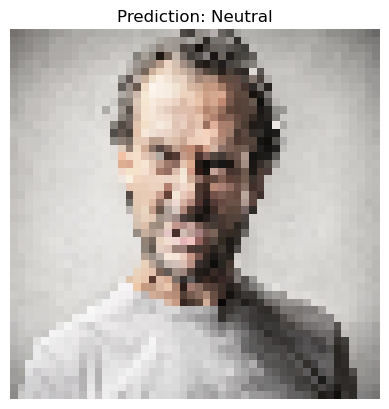

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to your test image
img_path = '/Users/nayanadorairaj/Desktop/Foundations of AI/angry.png'  # change this

# 1. Load and preprocess the image
img = image.load_img(img_path, target_size=(48, 48))  # adjust size to match your model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # shape becomes (1, height, width, channels)
img_array = img_array / 255.0  # normalize if your model was trained on [0, 1] range

# 2. Make prediction
pred = model.predict(img_array)

# 3. Interpret prediction
predicted_class = np.argmax(pred, axis=1)[0]
print("Predicted class index:", predicted_class)

# 4. Optional: if you have class labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Surprise', 'Neutral', 'Sad']  # adjust as needed
print("Predicted label:", class_labels[predicted_class])

# 5. Display the image
plt.imshow(img)
plt.title(f'Prediction: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()
